In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import itertools
import math
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import datetime
from datetime import date
import re

 # machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn import preprocessing

In [2]:
# Read data & print the head
v3 = pd.read_csv("v3.csv")
v3.head()

,Unnamed: 0,slot,DayOfWeek,PdDistrict,date,IncidntNum,AvgTemp,Humidity,Visibility,WindSpeed,...,NonWhi_Per,Lat_Per,Black_Per,Asian_Per,Pov_Per,PopDens,DayPopDens,Dem_Score,Res_Score,Res_Rank
0,0,slot1,Friday,BAYVIEW,2015-01-02,5,40.75,72.50,10.00,0.75,...,0.551012,0.17417,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
1,1,slot1,Friday,BAYVIEW,2015-01-16,5,50.50,92.75,6.75,0.75,...,0.551012,0.17417,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
2,2,slot1,Friday,BAYVIEW,2015-01-23,7,48.25,92.25,9.00,1.50,...,0.551012,0.17417,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
3,3,slot1,Friday,BAYVIEW,2015-01-30,2,52.25,95.50,10.00,5.25,...,0.551012,0.17417,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
4,4,slot1,Friday,BAYVIEW,2015-02-06,4,60.75,82.75,10.00,14.25,...,0.551012,0.17417,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0


In [3]:
v3["PdDistrict"].unique()

array(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'], dtype=object)

In [4]:
v3.loc[(v3["slot"] == "slot1"), "slot"] = 1
v3.loc[(v3["slot"] == "slot2"), "slot"] = 2
v3.loc[(v3["slot"] == "slot3"), "slot"] = 3
v3.loc[(v3["slot"] == "slot4"), "slot"] = 4
v3.loc[(v3["slot"] == "slot5"), "slot"] = 5
v3.loc[(v3["slot"] == "slot6"), "slot"] = 6

In [5]:
v3.loc[(v3["DayOfWeek"] == "Monday"), "DayOfWeek"] = 1
v3.loc[(v3["DayOfWeek"] == "Tuesday"), "DayOfWeek"] = 2
v3.loc[(v3["DayOfWeek"] == "Wednesday"), "DayOfWeek"] = 3
v3.loc[(v3["DayOfWeek"] == "Thursday"), "DayOfWeek"] = 4
v3.loc[(v3["DayOfWeek"] == "Friday"), "DayOfWeek"] = 5
v3.loc[(v3["DayOfWeek"] == "Saturday"), "DayOfWeek"] = 6
v3.loc[(v3["DayOfWeek"] == "Sunday"), "DayOfWeek"] = 7

In [6]:
v3.loc[(v3["PdDistrict"] == "BAYVIEW"), "PdDistrict"] = 1
v3.loc[(v3["PdDistrict"] == "CENTRAL"), "PdDistrict"] = 2
v3.loc[(v3["PdDistrict"] == "INGLESIDE"), "PdDistrict"] = 3
v3.loc[(v3["PdDistrict"] == "MISSION"), "PdDistrict"] = 4
v3.loc[(v3["PdDistrict"] == "NORTHERN"), "PdDistrict"] = 5
v3.loc[(v3["PdDistrict"] == "PARK"), "PdDistrict"] = 6
v3.loc[(v3["PdDistrict"] == "RICHMOND"), "PdDistrict"] = 7
v3.loc[(v3["PdDistrict"] == "SOUTHERN"), "PdDistrict"] = 8
v3.loc[(v3["PdDistrict"] == "TARAVAL"), "PdDistrict"] = 9
v3.loc[(v3["PdDistrict"] == "TENDERLOIN"), "PdDistrict"] = 10

In [7]:
v3 = v3.drop("Unnamed: 0", axis=1)
v3 = v3.drop("pd", axis=1)
v3 = v3.drop('date', axis=1)
v3.columns

Index(['slot', 'DayOfWeek', 'PdDistrict', 'IncidntNum', 'AvgTemp', 'Humidity',
       'Visibility', 'WindSpeed', 'Weekday/Weekend', 'Flood_Per', 'Heat_Per',
       'Liq_Per', 'Haz_Score', 'Imp_Per', 'Tree_Per', 'PM_Conc', 'Tox_Per',
       'Env_Score', 'AT_Min', 'PTrans_Sco', 'Trans_Sco', 'VCrim_Rate',
       'Vot_Rate', 'NewSF_Per', 'Citz_Per', 'Eng_Per', 'Com_Score',
       'Food_Score', 'HS_Per', 'Pharm_Per', 'PR_Score', 'LivAl_Per',
       'EldLivAl_Per', 'OC_Per', 'Viol_Rate', 'AC_Per', 'Rent_Per',
       'House_Score', 'Emp_per', 'Ec_Score', 'Shelt_Rate', 'SheltDay_Rate',
       'Dis_Per', 'PrevHos', 'Health_Score', 'Over85_Per', 'Over65_Per',
       'Under18_Per', 'Under5_Per', 'NonWhi_Per', 'Lat_Per', 'Black_Per',
       'Asian_Per', 'Pov_Per', 'PopDens', 'DayPopDens', 'Dem_Score',
       'Res_Score', 'Res_Rank'],
      dtype='object')

In [8]:
# Calculate the percentage of null values to make sure the data is cleaned

percent_col = []
for i in range(len(v3.columns)):
    percent_col.append(v3.iloc[:, i].isna().sum() / len(v3.iloc[:, i]))
pd.DataFrame(data=percent_col, columns=["Percentage of Null values"], index=v3.columns)

,Percentage of Null values
slot,0.0
DayOfWeek,0.0
PdDistrict,0.0
IncidntNum,0.0
AvgTemp,0.0
Humidity,0.0
Visibility,0.0
WindSpeed,0.0
Weekday/Weekend,0.0
Flood_Per,0.0


In [9]:
v3

,slot,DayOfWeek,PdDistrict,IncidntNum,AvgTemp,Humidity,Visibility,WindSpeed,Weekday/Weekend,Flood_Per,...,NonWhi_Per,Lat_Per,Black_Per,Asian_Per,Pov_Per,PopDens,DayPopDens,Dem_Score,Res_Score,Res_Rank
0,1,5,1,5,40.75,72.50,10.00,0.75,0,0.03922,...,0.551012,0.174170,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
1,1,5,1,5,50.50,92.75,6.75,0.75,0,0.03922,...,0.551012,0.174170,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
2,1,5,1,7,48.25,92.25,9.00,1.50,0,0.03922,...,0.551012,0.174170,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
3,1,5,1,2,52.25,95.50,10.00,5.25,0,0.03922,...,0.551012,0.174170,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
4,1,5,1,4,60.75,82.75,10.00,14.25,0,0.03922,...,0.551012,0.174170,0.194407,0.218534,0.289944,7992.97,9781.635,3.0,2.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61817,6,3,10,1,61.75,81.00,8.50,16.00,0,0.00000,...,0.543600,0.155041,0.079329,0.313486,0.561498,65411.70,101040.000,2.0,1.0,34.0
61818,6,3,10,1,53.50,70.00,10.00,1.50,0,0.00000,...,0.543600,0.155041,0.079329,0.313486,0.561498,65411.70,101040.000,2.0,1.0,34.0
61819,6,3,10,3,53.25,57.00,10.00,5.25,0,0.00000,...,0.543600,0.155041,0.079329,0.313486,0.561498,65411.70,101040.000,2.0,1.0,34.0
61820,6,3,10,4,49.00,61.25,10.00,7.75,0,0.00000,...,0.543600,0.155041,0.079329,0.313486,0.561498,65411.70,101040.000,2.0,1.0,34.0


In [10]:
train_v3, test_v3 = train_test_split(v3, test_size = 0.30)

In [11]:
train_v3.shape

(43275, 59)

In [12]:
test_v3.shape

(18547, 59)

In [13]:
X_train = train_v3.drop("IncidntNum", axis=1)
Y_train = train_v3["IncidntNum"]
X_test = test_v3.drop("IncidntNum", axis=1)
Y_test = test_v3["IncidntNum"]

In [14]:
# Train model
model = LinearRegression()
model.fit(X_train, Y_train)
display(model.intercept_)
display(model.coef_)

-8.267293799985802

array([ 9.77752732e-01,  1.22676061e-01, -4.17024646e-01,  4.34555684e-02,
       -3.01388099e-02, -7.05151605e-02,  4.73130243e-02, -4.89230350e-01,
       -3.95023794e-04,  1.05000064e-02,  8.58150353e-03,  5.35738462e-02,
        4.88406467e-02, -2.36761222e-02, -7.60409664e-03,  9.39338140e-03,
       -2.56800732e-01,  5.38755975e-01, -6.14401476e-01,  7.33335961e-02,
       -1.76623148e-02,  1.58545411e-03, -3.67083584e-03,  9.40288377e-03,
        1.87223610e-02, -1.97684524e-01,  5.81844346e-02, -4.71067373e-03,
        2.42098600e-02, -3.59741284e-02, -1.90060819e-02, -2.54706032e-03,
        3.37346257e-03,  2.02288141e-01,  7.23566943e-03, -2.69397506e-03,
        1.34077658e-01,  5.54920293e-03,  3.76286140e-01,  1.11286115e-01,
        8.67579208e-02,  3.85769963e-03, -5.20543886e-03,  3.76286140e-01,
       -6.88652696e-03, -3.87484685e-03,  5.02864356e-03, -1.66386437e-03,
       -2.49789427e-03,  2.13324011e-02,  3.32897918e-03,  1.44431333e-02,
       -1.31942686e-02,  

In [15]:
# RMSE function implementation
def rmse(pred, actual):
    return np.sqrt(((pred - actual)**2).mean())

In [16]:
# Predicitions based on the current model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the training RMSE
train_rmse = rmse(y_pred_train, Y_train)
display(train_rmse)

# Calculate the test RMSE
test_rmse = rmse(y_pred_test, Y_test)
display(test_rmse)

4.119340639476444

4.110084172603454

In [17]:
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(model.score(X_test, Y_test)))

Variance score: 0.39979029958962664


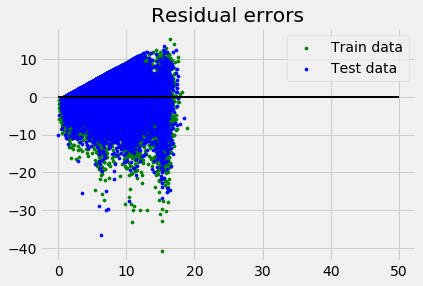

In [18]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

Text(0, 0.5, 'Predictions')

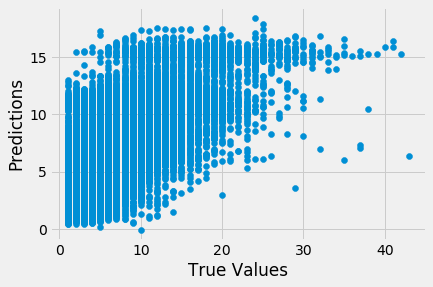

In [19]:
## The line / model
plt.scatter(Y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [20]:
# Train for different sizes of training and test sets
train_size = [100, 200, 300, 400, 500, len(X_train)]
train_error = []
test_error = []

# Loop through the data size to get different training and test error
for i in train_size:
    model_split = LinearRegression()
    model_split.fit(X_train.iloc[0:i,:],  Y_train.iloc[0:i])
    Y_pred_train_split = model_split.predict(X_train.iloc[0:i,:])
    Y_pred_test_split = model_split.predict(X_test)
    Train_rmse = rmse(Y_pred_train_split, Y_train.iloc[0:i])
    Test_rmse = rmse(Y_pred_test_split, Y_test)
    train_error.append(Train_rmse)
    test_error.append(Test_rmse)
    print("Training Error for Data Size " + str(i) + " is " + str(Train_rmse))
    print("Test Error for Data Size " + str(i) + " is " + str(Test_rmse))

Training Error for Data Size 100 is 3.134126119789914
Test Error for Data Size 100 is 4.775553169732734
Training Error for Data Size 200 is 3.80614719366508
Test Error for Data Size 200 is 4.302953278535201
Training Error for Data Size 300 is 3.7790141667056636
Test Error for Data Size 300 is 4.182906278652992
Training Error for Data Size 400 is 3.7192701269328228
Test Error for Data Size 400 is 4.142597472629091
Training Error for Data Size 500 is 3.958181260743662
Test Error for Data Size 500 is 4.168822023934947
Training Error for Data Size 43275 is 4.119340639476444
Test Error for Data Size 43275 is 4.110084172603454


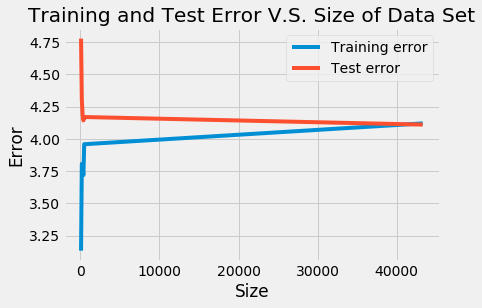

In [21]:
# Plot
plt.plot(train_size, train_error, label = "Training error")
plt.plot(train_size, test_error, label = "Test error")
plt.xlabel("Size")
plt.ylabel("Error")
plt.title("Training and Test Error V.S. Size of Data Set")
plt.legend()
plt.show()